<a href="https://colab.research.google.com/github/Praveengovianalytics/-Kaggle_Great_Energy_Pred_III_1/blob/master/01_Lending_Club_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lending Club Exploratory Data Analysis

## Index  :- 

  1. Understand the data & classify its attributes
  2. DataQuality Check 
  3. Profile the data and note Important Observation
  4. Data Cleaning 
  5. Dependent Variable Analysis 
  6. Univariate Analysis
  7. Bivariate Analysis
  6. Analysing Catagorical Variables
  7. Summary & Keypoints for Data Engineering & Modeling

In [1]:
!pip install -q klib
!pip install -q pandas_profiling
!pip install -q sweetviz

     |████████████████████████████████| 22.3MB 1.7MB/s 
     |████████████████████████████████| 15.1MB 5.2MB/s 
     |████████████████████████████████| 81kB 2.5MB/s 


In [2]:
import pandas as pd
import numpy as np 
import klib
import pandas_profiling
import seaborn as sns
import sweetviz as sv
import datetime
# Data Visualisation libraries 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27 

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings("ignore")

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
!ls "/content/gdrive/My Drive/Colab Notebooks/IIIB-ML-AI/02_Statistics/02_Lending_Club_Case_Study/04_Lending_club_Case_Study/Data/"

Data_Dictionary.xlsx  loan.csv


In [15]:
DATA_PATH="/content/gdrive/My Drive/Colab Notebooks/IIIB-ML-AI/02_Statistics/02_Lending_Club_Case_Study/04_Lending_club_Case_Study/Data/"

In [26]:
df_dict_loan_stat = pd.read_excel(DATA_PATH+'Data_Dictionary.xlsx',sheet_name='LoanStats')
df_dict_rej_stat = pd.read_excel(DATA_PATH+'Data_Dictionary.xlsx',sheet_name='RejectStats')
df = pd.read_csv(DATA_PATH+'loan.csv', low_memory=False)

In [27]:
print( "Total Unique Customers accepted for Loan :- ",len(df['member_id'].unique()))

Total Unique Customers accepted for Loan :-  39717


In [28]:
pd.options.display.max_columns = None
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [45]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

## Let see how the missing data in dataset before Preprocessing

GridSpec(6, 6)

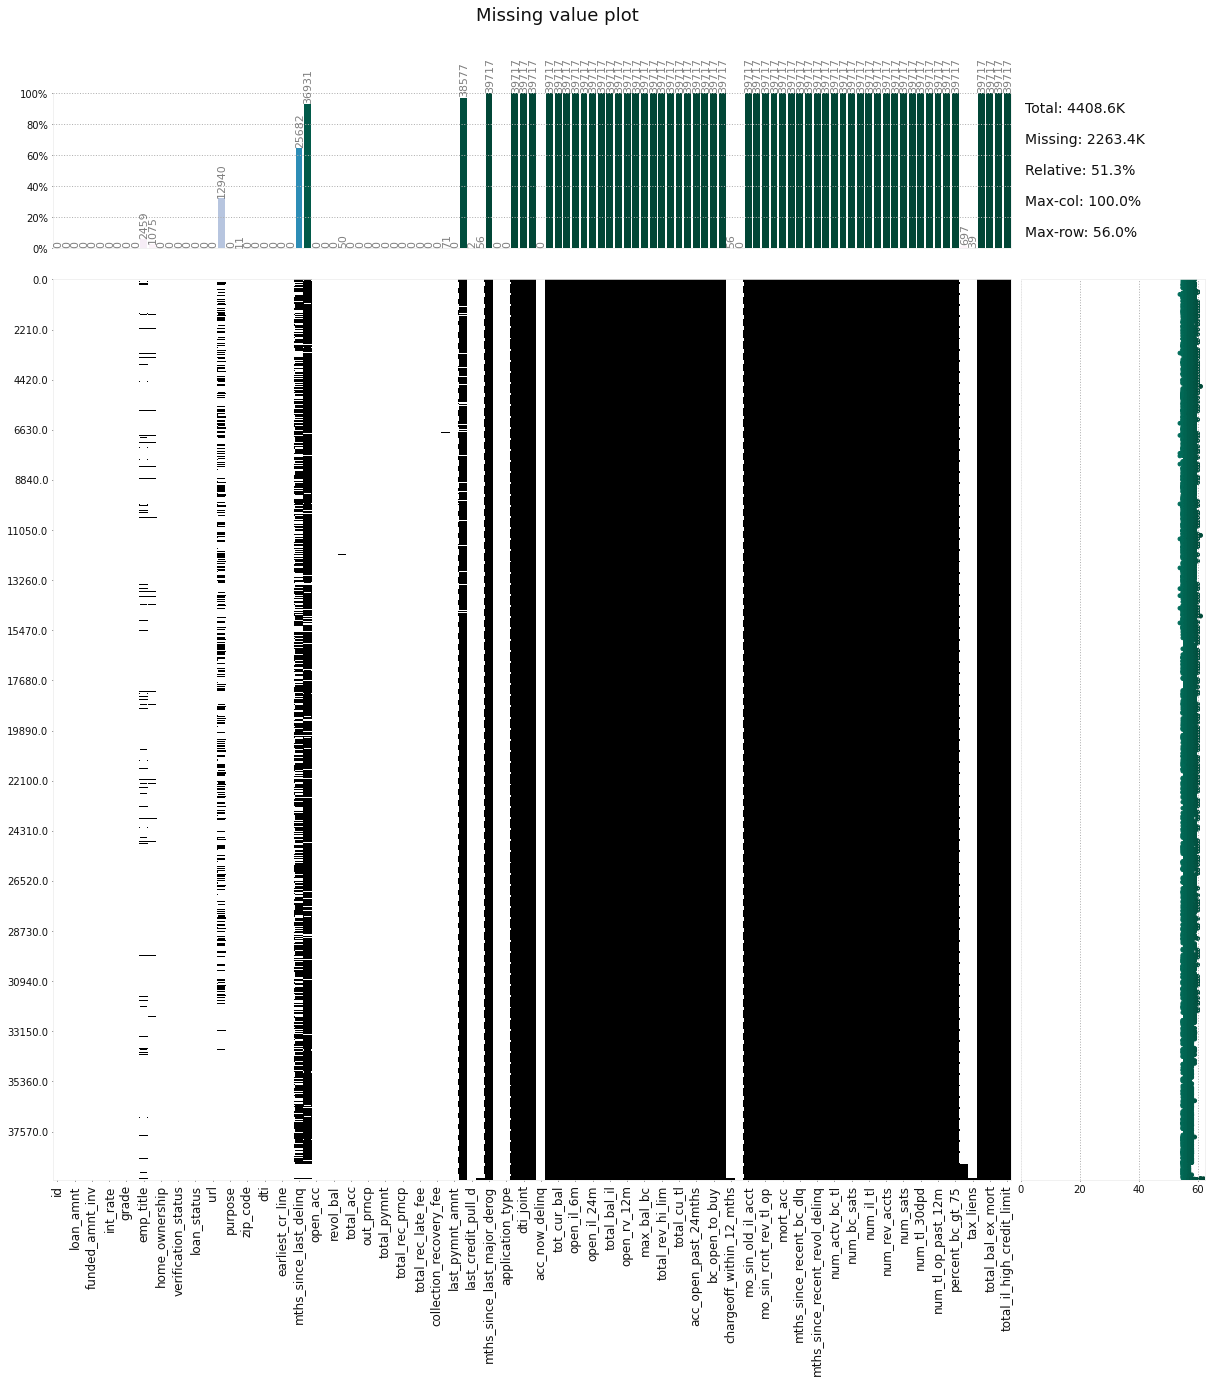

In [30]:
klib.missingval_plot(df)

### Get a list of columns that have more than 80% null values

In [31]:
na_values = df.isnull().mean()
na_values[na_values>0.8]

mths_since_last_record            0.929854
next_pymnt_d                      0.971297
mths_since_last_major_derog       1.000000
annual_inc_joint                  1.000000
dti_joint                         1.000000
verification_status_joint         1.000000
tot_coll_amt                      1.000000
tot_cur_bal                       1.000000
open_acc_6m                       1.000000
open_il_6m                        1.000000
open_il_12m                       1.000000
open_il_24m                       1.000000
mths_since_rcnt_il                1.000000
total_bal_il                      1.000000
il_util                           1.000000
open_rv_12m                       1.000000
open_rv_24m                       1.000000
max_bal_bc                        1.000000
all_util                          1.000000
total_rev_hi_lim                  1.000000
inq_fi                            1.000000
total_cu_tl                       1.000000
inq_last_12m                      1.000000
acc_open_pa

### Drop columns with more than 80% null values

In [32]:
df.dropna(thresh = df.shape[0]*0.2, how = 'all', axis = 1, inplace = True)
na_values = df.isnull().mean()
na_values[na_values>0.8]

Series([], dtype: float64)

GridSpec(6, 6)

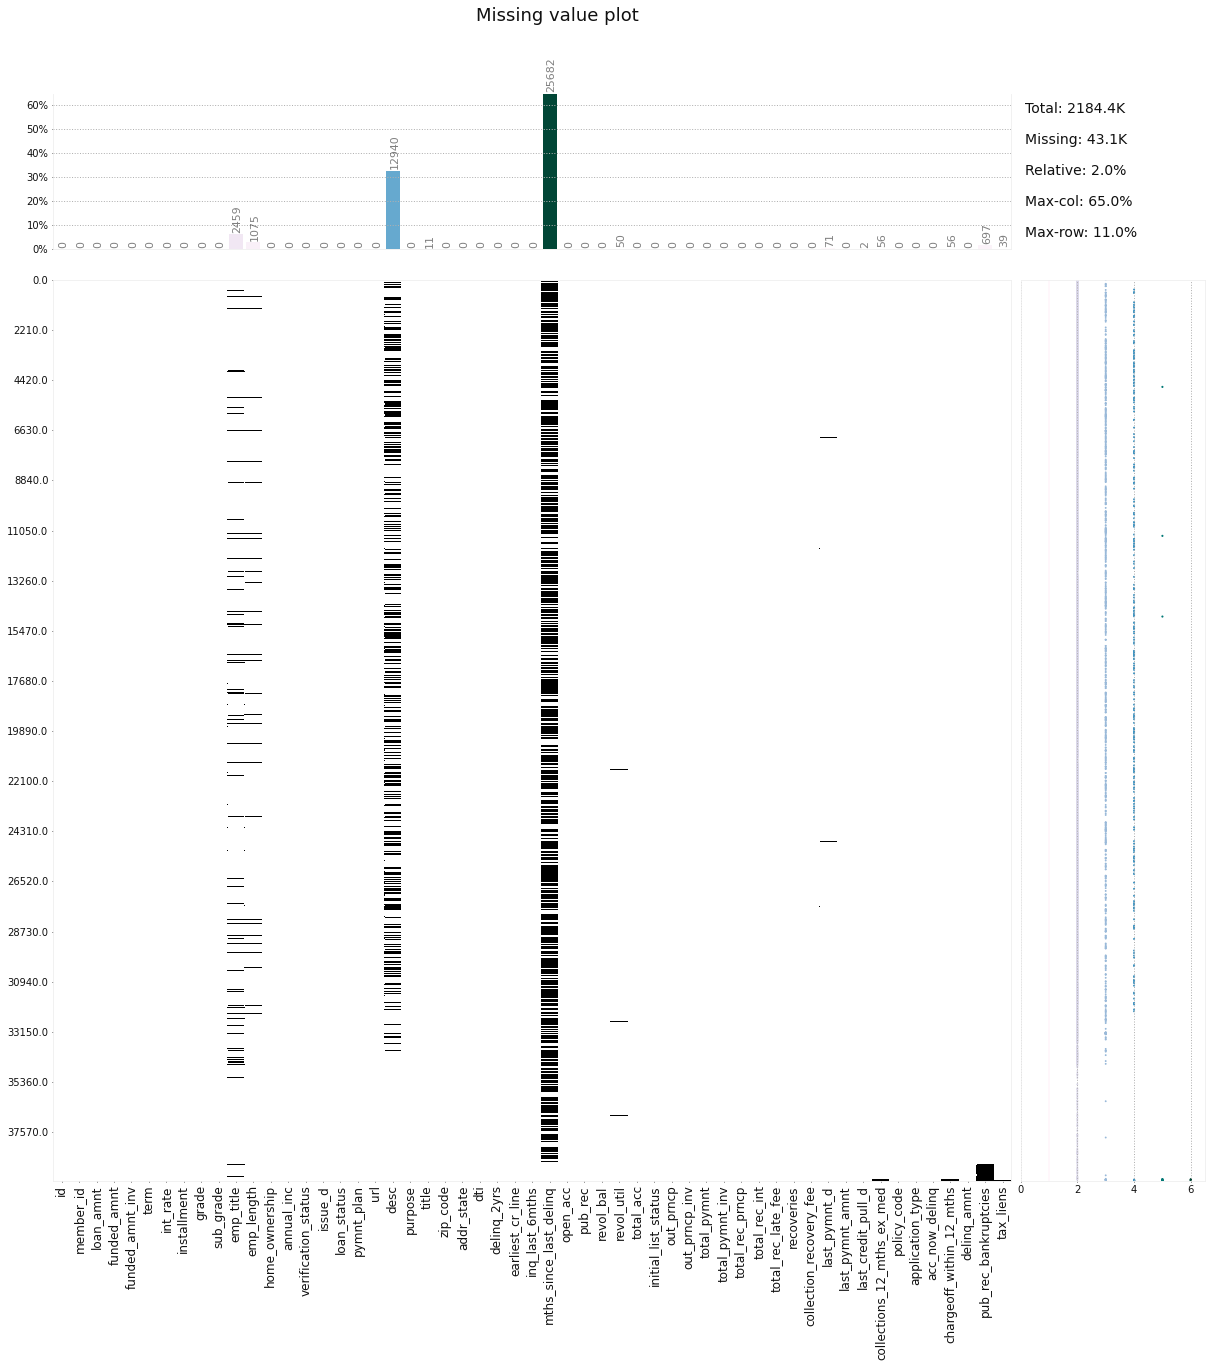

In [33]:
klib.missingval_plot(df)

#### Observation :- 
* Employment Title , URL has around 30% missing values
* Need to treat the mths_since_last_delinq field , It has 65% of missing values

# 3.Profile the data and note Important Observation

In [46]:
configure_plotly_browser_state()
source = df['loan_status'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Status distribution')
fig.show()

In [44]:
df['loan_status_1'] = np.where(df.loc[:, 'loan_status'].isin(['Charged Off']), 1, 0)

In [47]:
configure_plotly_browser_state()
source = df['loan_status_1'].value_counts()
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Status distribution')
fig.show()

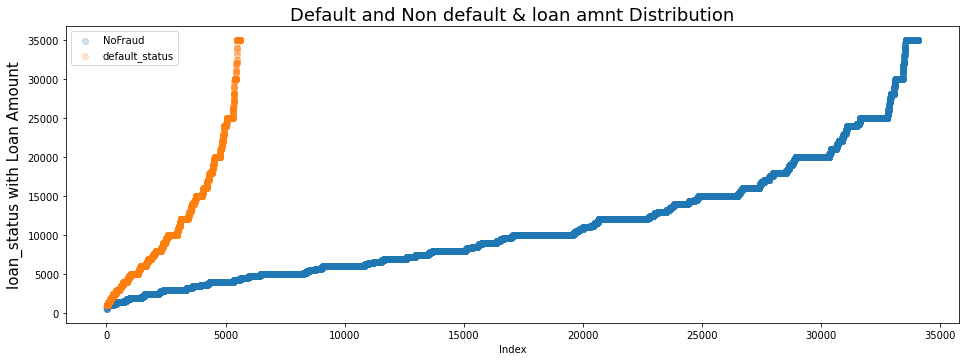

In [63]:
plt.figure(figsize=(16,12))
plt.subplot(212)
g4 = plt.scatter(range(df[df['loan_status_1'] == 0].shape[0]),
                 np.sort(df[df['loan_status_1'] == 0]['loan_amnt'].values), 
                 label='NoFraud', alpha=.2)
g4 = plt.scatter(range(df[df['loan_status_1'] == 1].shape[0]),
                 np.sort(df[df['loan_status_1'] == 1]['loan_amnt'].values), 
                 label='default_status', alpha=.2)
g4= plt.title("Default and Non default & loan amnt Distribution", fontsize=18)
g4 = plt.xlabel("Index")
g4 = plt.ylabel("loan_status with Loan Amount", fontsize=15)
g4 = plt.legend()

In [ ]:
def CalcOutliers(df_num): 

    print("===============================================")
    print("     OUTLIER PROFILE - ",df_num.name)
    print("==============================================")

    # calculating mean and std of the array
    data_mean, data_std = np.mean(df_num), np.std(df_num)

    # seting the cut line to both higher and lower values
    # You can change this value
    cut = data_std * 3
    df_num.median()

    #Calculating the higher and lower cut values
    lower, upper = data_mean - cut, data_mean + cut

    # creating an array of lower, higher and total outlier values 
    outliers_lower = [x for x in df_num if x < lower]
    outliers_higher = [x for x in df_num if x > upper]
    outliers_total = [x for x in df_num if x < lower or x > upper]

    # array without outlier values
    outliers_removed = [x for x in df_num if x > lower and x < upper]


    data_median = df_num.median()

    print('Mean                        : %d' % data_mean) # printing total number of values in lower cut of outliers
    print('Median                      : %d' % data_median) # printing total number of values in higher cut of outliers
    print('Standard Deviation          : %d' % data_std) # printing total number of values outliers of both sides
    print('Upper Cutoff                : %d' % abs(lower)) # printing total number of values outliers of both sides
    print('Lower Cutoff                : %d' % abs(upper)) # printing total number of values outliers of both sides
    print('Identified lowest outliers. : %d' % len(outliers_lower)) # printing total number of values in lower cut of outliers
    print('Identified upper outliers   : %d' % len(outliers_higher)) # printing total number of values in higher cut of outliers
    print('Total outlier observations. : %d' % len(outliers_total)) # printing total number of values outliers of both sides
    print('Non-outlier observations    : %d' % len(outliers_removed)) # printing total number of non outlier values
    print("Total percentual of Outliers:", round((len(outliers_total) / len(outliers_removed) )*100, 4)) # Percentual of outliers in points
    return

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


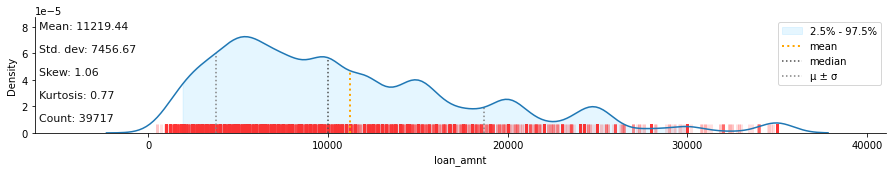

In [24]:
klib.dist_plot(df['loan_amnt'])

(0.0, 2e-05)

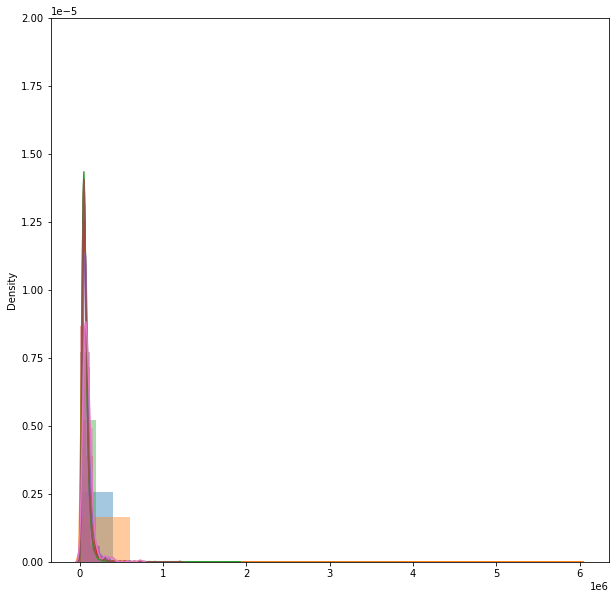

In [51]:
grade_list = df['grade'].unique()
plt.figure(figsize=(10,10))
for i in range(len(grade_list)):
    data = df[df['grade'] == grade_list[i]]['annual_inc'].values
    sns.distplot(data, bins = 10)
plt.ylim(ymax = 0.00002)

# Loan Purpose Share

In [53]:
configure_plotly_browser_state()
source = df.purpose.value_counts().sort_values(ascending=False)
fig = go.Figure(data=[go.Pie(labels=source.index,values=source.values)])
fig.update_layout(title='Loan Purpose Share')
fig.show()

There seems to be a slight difference in income level across grade, with one grade has a high density of income above $100,000. Perhaps it may not be beneficial to dive too deep into it, except having a brief look at the median income accross each grade. We do see that while other grades seem to have similar median incomes, grade A does stand out

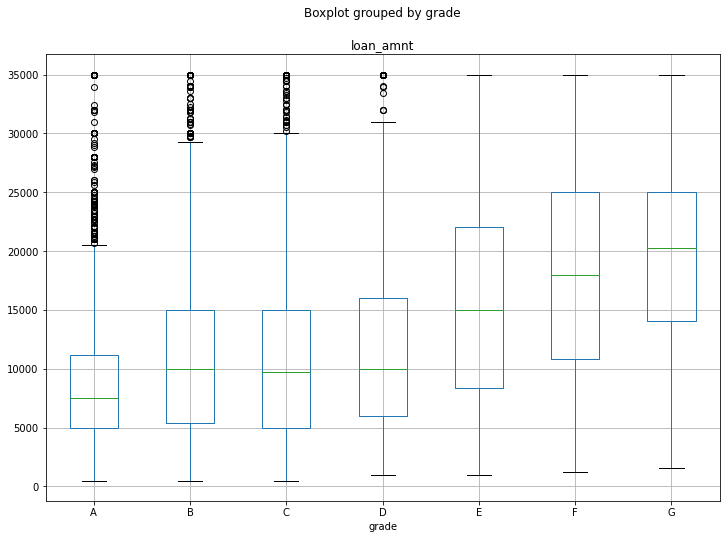

In [62]:
df.boxplot(by = 'grade', column = 'loan_amnt')

### Median of incomes in each grade

In [54]:
income_median = pd.pivot_table(df, values = 'annual_inc', index = 'grade', aggfunc = np.median)
income_median

,annual_inc
grade,
A,57600.0
B,57989.5
C,56000.0
D,59000.0
E,65000.0
F,72000.0
G,80000.0
